参考上课讲授的案例，在母校安徽医科大学网站中选择某一主题页面 如(通知公告、医大要闻、校园动态等)，使用 requests.get() 爬取该主题下面连续10个以上页面的源码，再使用正则表达式筛选出每页中的标题、标题超链接和标题内容的发布日期 ，保存到ahmu_news.csv文件中。
将同样的代码稍作修改，爬取合肥工业大学通知网站上相应的内容，比较两个学校网站访问方式的区别。


In [3]:
import requests,re,os,csv
import time,random
from urllib.parse import urljoin       #用于网址域服务器与资源的连接


def get_text(url):                      #定义根据网址获取网页源代码的函数
    try:
        r=requests.get(url)      
        r.raise_for_status()                   #用于触发异常错误
        #r.encoding=r.apparent_encoding
        r.encoding="utf-8"
        return r.text
    except:
        print("No data ....")
        return None
    
def get_page(text):                     #定义根据爬取的网页源代码，用正则解析网页中的数据
    ls=[]                                           #定义一个存放网页数据的空列表
    htp="https://www.ahmu.edu.cn"                   #网页域服务器网址
    pat1=r'<div id="wp_news_w9">\s*<ul.*?>(.+?)</ul>'          #定义缩小网页数据所在的区域的正则表达式
    txt1=re.search(pat1,text,re.S).group(1)           #获取满足正则的子模式数据     
    pat2=r"<li.+?<a href='(.+?)'.+?>(.+?)</a>.+?<span.+?>(.+?)</span>"          #定义获取具体数据的正则，分别提取标题的超链接、标题及发布日期
    lst=re.findall(pat2,txt1,re.S)                   #获取一个包含多个元组数据的列表，此为二维数据
    for h,t,d in lst:                               #遍历列表中每个元组，序列解包给三个变量，分别存放超链接、标题、和发布日期
        if h.startswith("http"):                     #检测超链接字符串是否是http开头，以http开头的超链接为正确的超链接网址
            pass
        else:
            h=urljoin(htp,h)                         #对缺少http开头的网页资源，在前面补充域服务器网址
        ls.append([t,h,d])                           #将标题、超链接及发布日期先放在一个列表中，再追加到网页数据的列表里
    return ls                                       #返回所提取此网页源代码中的网页数据列表 

def save_csv(data):                                  #将爬取的多个页面网页中提取的数据写入csv文件
    with open(r'.\ahmu_news.csv','w',encoding='utf-8',newline="") as fp:
        csv_w=csv.writer(fp)
        csv_w.writerow(['新闻标题','标题链接','发布日期'])
        for da in data:
            csv_w.writerow(da)

def main():             #定义一个主函数，连接多个子函数，完成整个任务
    data=[]
    for i in range(1,11):
        url0=f"https://www.ahmu.edu.cn/4327/list{i}.htm"
        print(f"正在下载第{i}页数据.....")
        html=get_text(url0)
        if html is None:                  
            continue                         #如果当前网页源代码没有爬取成功，回到循环开始，继续下一个网页数据的爬取
        plst=get_page(html)
        data.extend(plst)
        time.sleep(random.random())           #每爬取一个网页页面数据，应随机暂停一个时间间隙，以模仿人工操作浏览器
    print("下载完毕。") 
    save_csv(data)
    
if __name__=="__main__":
    main()                     #运行主函数


正在下载第1页数据.....
正在下载第2页数据.....
正在下载第3页数据.....
正在下载第4页数据.....
正在下载第5页数据.....
正在下载第6页数据.....
正在下载第7页数据.....
正在下载第8页数据.....
正在下载第9页数据.....
正在下载第10页数据.....
下载完毕。


参考上课讲授的案例，在百度图片搜索引擎中输入任意一主题关键字“华山”，编程从百度网站上下载300幅以上该主题的图片，并保存在指定的文件夹中。

In [2]:
import os,json,requests
import random,time

def get_text(url,head):                #根据网页链接，下载JSON文件数据
    try:
        r=requests.get(url,headers=head)
        r.raise_for_status()
        r.encoding='utf-8'
        return r.text
    except:
        print("网页数据下载失败！！！")
        return None

def get_cont(url,head):      #根据图片链接，下载图片数据流
    try:
        r=requests.get(url,headers=head)
        r.raise_for_status()
        return r.content
    except:
        print('网页下载失败...')
        return None


def page_imgurl(tjson):        #从下载的JSON文件中提取图片的链接，存入列表
    dic=json.loads(tjson)
    img_url=dic['data']
    imgurllst=[]
    for ur in img_url:
        try:
            imgurllst.append(ur['thumbURL'])
        except:
            pass
    return imgurllst 

def create_dir():
    pimg='d:\\huashan_photo'                           #定义D盘的一个存放图片的文件夹
    if not os.path.exists(pimg):         #如果此文件夹不存在
        os.mkdir(pimg)                     #就创建此文件夹
    return pimg


def main():                   #定义一个主函数，连接多个子函数，完成整个任务
    head={"User-Agent":"Mozilla/5.0"}
    n=0                                    #设置图片文件的序号
    pimg=create_dir()
    imgurl_lst=[]
    for i in range(0,301,30):               #爬取11个json文件的图片  
        url=f'https://image.baidu.com/search/acjson?tn=resultjson_com&logid=8523728513556086080&ipn=rj&ct=201326592&is=&fp=result&fr=&word=%E5%8D%8E%E5%B1%B1&queryWord=%E5%8D%8E%E5%B1%B1&cl=2&lm=&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=0&hd=&latest=&copyright=&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&expermode=&nojc=&isAsync=&pn={i}&rn=30&gsm=1e&1716644061871='
        print(f"正在下载第{int(i/30)+1}个json文件..")
        imgjson=get_text(url,head)                   #根据JSON数据的链接地下，调用函数下载JSON数据 
        imgurl_lst.extend(page_imgurl(imgjson))              #调用函数从下载的JSON数据中提取图片的链接，存入列表
        time.sleep(random.random())               #每下载完一个数据，暂停一个随机时间，以模拟人工操作
    print("下载完毕....")
    for i in range(len(imgurl_lst)):             #根据图片链接列表的长度进行循环
        n+=1
        purl=imgurl_lst[i]                       #取第i个图片的链接
        img_cont=get_cont(purl,head)            #根据图片的链接，下载图片数据的字节流   
        fn=os.path.join(pimg,f'hsimg{n}.jpg')   #构建保存在D盘图片文件夹下的图片引用名
        with open(fn,'wb') as fimg:             #用写字节流方式创建一个新文件
            fimg.write(img_cont)                #把下载的图片数据字节流写入文件

                
if __name__=='__main__':
    main()                   #运行主函数  

正在下载第1个json文件..
正在下载第2个json文件..
正在下载第3个json文件..
正在下载第4个json文件..
正在下载第5个json文件..
正在下载第6个json文件..
正在下载第7个json文件..
正在下载第8个json文件..
正在下载第9个json文件..
正在下载第10个json文件..
正在下载第11个json文件..
下载完毕....


参考上课讲授的案例，在豆瓣网站中选择某一主题(如图书，电影，音乐等)内容，爬取10个以上的页面，获取300条以上的网友评论，再对评论数据先进行有效性数据清洗处理，再进行词频统计，制作词云图，根据统计的结果，分析网友对该主题的评论，将统计的结果，制作的词云图及分析的结论一同保存在以“学号姓名”命名的word文档中。

本程序是在豆瓣网上爬取电影《满江红》的网友评论，计2000条。

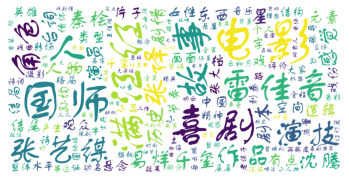

In [87]:
import requests,re,os,csv
import time,random
from collections import Counter
import jieba
import jieba.posseg as psg
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def add_renname():       #在jieba分词词典中添加演员的姓名，以提高分词的准确度
    act="张艺谋/秦桧/岳飞/老谋子/沈腾/易烊千玺/张译/雷佳音/岳云鹏/王佳怡/潘斌龙/余皑磊/郭京飞/欧豪/魏翔/张弛/黄炎/许静雅/蒋鹏宇/林博洋/飞凡/任思诺/陈永胜/张壹男/"
    act=act.replace('/',' nr \n')
    with open(r'mjhrm.txt','w',encoding='utf-8') as fp:
        fp.write(act)
    jieba.load_userdict('mjhrm.txt')        #将文件数据加入到分词词典中

def get_text(url,head):                      #定义根据网址获取网页源代码的函数
    try:
        r=requests.get(url,headers=head)      #修改访问请求数据的头部信息
        r.raise_for_status()                   #用于触发异常错误
        #r.encoding=r.apparent_encoding
        r.encoding="utf-8"
        return r.text
    except:
        print("No data ....")
        return None

def get_page(text):                     #定义根据爬取的网页源代码，用正则解析网页中的数据
    pls=[]
    pat1=r'<div class="article">(.+?)<div class="aside">'
    txt=re.search(pat1,text,re.S).group(1)
    pat2=r'<h3>.+?<span class="comment-info">\s+<a.+?>(.+?)</a>.+?<span class="short">(.+?)</span>'
    lst=re.findall(pat2,txt,re.S)
    for u,c in lst:
        c='\n'.join(c.split())
        pls.append([u,c])
    return pls                                       #返回所提取此网页源代码中的网页数据列表 

def save_csv(data):                                  #将爬取的多个页面网页中提取的数据写入csv文件
    with open(r'.\mjhpl.csv','w',encoding='utf-8',newline="") as fp:
        csv_w=csv.writer(fp)
        csv_w.writerow(['发帖人','内容'])
        for da in data:
            csv_w.writerow(da)

def make_wc(data):
    ls=[]
    for u,c in data:
        ls.append(c)
    words="".join(ls)        #将所有的评论合成为一个字符串
    for c in "，。‘’“”\n 　？、》《（）！；：－":
        words=words.replace(c,"")              #删除字符串中的中文标点符号
        
    wordlst=psg.lcut(words)
    nlst=[w.word for w in wordlst if w.flag in ('n','nr','ns','nd') ]
    ndic=Counter(nlst)
    vlst=[w.word for w in wordlst if w.flag in ('v','vn','vt') ]
    vdic=Counter(vlst)
    wlst=jieba.lcut(words)
    wdic=Counter(wlst)

    wc=WordCloud(font_path='FZSTK.TTF',
                width=3000,height=1500,        #设置词云图的宽度和高度
                background_color="white",      #词云图背景设置为白色
                max_words=150,                 #设置最多单词数
                max_font_size=500,             #设置单词显示的最大尺寸
                min_font_size=50)

    wdimg=wc.generate_from_frequencies(ndic)    #使用字典制作词云对象
    plt.imshow(wdimg)
    wdimg.to_file(r'.\mjh_w.jpg')               #把词云图保存为文件
    plt.axis('off')                             #不显示词云图的坐标轴

def main():             #定义一个主函数，连接多个子函数，完成整个任务
    data=[]
    head={"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
         "Cookie":'ll="118183"; bid=JQ4Th8rSgFA; _ga=GA1.1.1598049148.1670718911; _ga_RXNMP372GL=GS1.1.1670718911.1.1.1670718956.15.0.0; gr_user_id=ab1848c4-fe16-4136-9cd4-918674f4a59d; __gads=ID=d841bf0ec1c981f0-22fd3a4ad8d80049:T=1670718982:RT=1670718982:S=ALNI_MYx_lFG9eI7hs3cIHkbEsL6zXXuaQ; _vwo_uuid_v2=DA1663D2A0E96108631162D1BFDCE7409|b34b5f236afcb4787fd6b8d318262077; __utmv=30149280.21034; __yadk_uid=xMBEY1rFFmfzdkdhbmUaa8TLcdL4G9WY; push_noty_num=0; push_doumail_num=0; __utmc=30149280; __utmc=223695111; Hm_lvt_d7c7037093938390bc160fc28becc542=1682673741,1682999414; __gpi=UID=00000b8dff612c63:T=1670718982:RT=1682999451:S=ALNI_Mb0yvAcyU-fQjVeAIY76Ylaon6PNg; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1683013717%2C%22https%3A%2F%2Fwww.douban.com%2F%22%5D; _pk_ses.100001.4cf6=*; ap_v=0,6.0; __utma=30149280.1174238452.1670718886.1683011213.1683013718.13; __utmz=30149280.1683013718.13.3.utmcsr=douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/; __utma=223695111.1598049148.1670718911.1683003471.1683013718.10; __utmb=223695111.0.10.1683013718; __utmz=223695111.1683013718.10.9.utmcsr=douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/; __utmt=1; __utmb=30149280.1.10.1683013718; dbcl2="210340270:mseRI4E9hmM"; ck=hEW5; _pk_id.100001.4cf6=6912b02b529cf808.1670745787.10.1683013749.1683003702.; Hm_lpvt_d7c7037093938390bc160fc28becc542=1683013750',
         "Host":'movie.douban.com'}
    for i in range(100):
        #url0=f"https://movie.douban.com/subject/35465232/reviews?start={i}"
        url0=f"https://movie.douban.com/subject/35766491/comments?start={i}&limit=20&status=P&sort=new_score"
        print(f"正在下载第{i}页数据.....")
        html=get_text(url0,head)
        if html is None:                  
            continue                         #如果当前网页源代码没有爬取成功，回到循环开始，继续下一个网页数据的爬取
        plst=get_page(html)
        data.extend(plst)
        time.sleep(random.uniform(0,3))           #每爬取一个网页页面数据，应随机暂停一个时间间隙，以模仿人工操作浏览器
    print("下载完毕。") 
    save_csv(data)
    add_renname()
    make_wc(data)    
if __name__=="__main__":
    main()                     #运行主函数

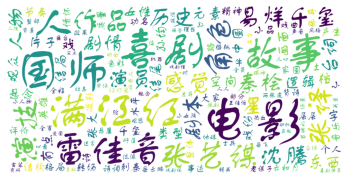

In [88]:
#制作名词词云图
ndimg=wc.generate_from_frequencies(ndic)
plt.imshow(ndimg)
img=ndimg.to_image()
img.save(r'.\mjh_n.jpg')
plt.axis('off');

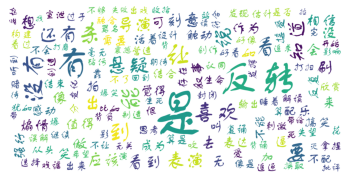

In [85]:
#制作动词词云图
vdimg=wc.generate_from_frequencies(vdic)
plt.imshow(vdimg)
vdimg.to_file(r'.\mjh_v.jpg')
plt.axis('off');